In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_pickle("data_closed_rigid_o")
data

,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,Ystudy,Illness,Nmedication,...,Internal fixation in the medulla,Internal fixation in the knee,Corrective lens,Prosthesis aortic valve,Dental_total,Support_total,Hearing_total,Internal fixation in the toe_foot_total,Orthosis in the knee_total,PF50_closed_rigid
0,33.000000,0,1,157.5,54.20,21.849332,21.80,17,1,1,...,0,0,1,0,0,0,0,0,0,0.200000
1,27.583333,0,1,154.0,44.00,18.552876,22.45,17,0,0,...,0,0,0,0,0,0,0,0,0,0.133333
2,36.916667,0,0,161.7,63.40,24.247626,23.10,11,0,0,...,0,0,0,0,1,0,0,0,0,0.133333
3,61.750000,1,0,164.0,68.35,25.412701,24.70,1,0,0,...,0,0,0,0,1,0,0,0,0,0.144444
4,49.333333,0,0,163.5,70.65,26.428752,23.70,10,0,1,...,0,0,1,0,1,0,0,0,0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,24.170000,0,1,161.0,51.70,19.950000,22.50,16,0,0,...,0,0,1,0,0,0,0,0,1,0.077778
203,27.750000,0,0,172.0,101.80,34.290000,24.05,15,1,0,...,0,0,1,0,0,0,0,0,0,0.244444
204,34.170000,0,1,156.0,53.45,21.820000,22.00,15,1,0,...,0,0,1,0,0,0,0,0,0,0.122222
205,37.920000,0,0,155.0,69.55,28.950000,22.35,25,0,0,...,0,0,1,0,0,0,0,0,0,0.266667


In [3]:
pf50 = data["PF50_closed_rigid"].values
pf50

array([0.2       , 0.13333333, 0.13333333, 0.14444444, 0.2       ,
       0.11111111, 0.28888889, 0.16666667, 0.1       , 0.12222222,
       0.45555556, 0.2       , 0.13333333, 0.06666667, 0.11111111,
       0.08888889, 0.13333333, 0.25555556, 0.14444444, 0.14444444,
       0.15555556, 0.08888889, 0.18888889, 0.11111111, 0.11111111,
       0.38888889, 0.16666667, 0.14444444, 0.07777778, 0.21111111,
       0.21111111, 0.11111111, 0.21111111, 0.12222222, 0.11111111,
       0.18888889, 0.2       , 0.13333333, 0.15555556, 0.14444444,
       0.16666667, 0.13333333, 0.33333333, 0.34444444, 0.16666667,
       0.07777778, 0.36666667, 0.18888889, 0.08888889, 0.2       ,
       0.15555556, 0.11111111, 0.14444444, 0.12222222, 0.07777778,
       0.26666667, 0.34444444, 0.15555556, 0.08888889, 0.32222222,
       0.08888889, 0.14444444, 0.15555556, 0.21111111, 0.21111111,
       0.12222222, 0.21111111, 0.17777778, 0.17777778, 0.26666667,
       0.3       , 0.4       , 0.24444444, 0.1       , 0.13333

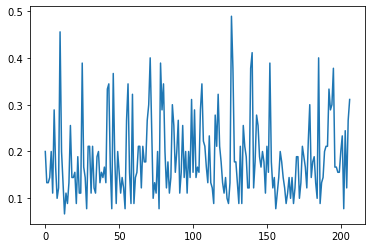

In [4]:
plt.plot(pf50)
plt.show()

(array([25., 63., 42., 33., 13., 11.,  8.,  9.,  1.,  2.]),
 array([0.06666667, 0.10888889, 0.15111111, 0.19333333, 0.23555556,
        0.27777778, 0.32      , 0.36222222, 0.40444444, 0.44666667,
        0.48888889]),
 <a list of 10 Patch objects>)

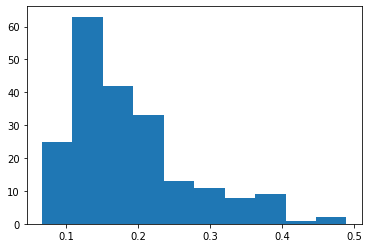

In [5]:
plt.hist(pf50)

In [6]:
columns_to_normalize = ["Age","Height","Weight","BMI","FootLen","Ystudy"]

In [7]:
data[columns_to_normalize] = (data[columns_to_normalize] - data[columns_to_normalize].mean())/data[columns_to_normalize].std()
data


,Age,AgeGroup,Gender,Height,Weight,BMI,FootLen,Ystudy,Illness,Nmedication,...,Internal fixation in the medulla,Internal fixation in the knee,Corrective lens,Prosthesis aortic valve,Dental_total,Support_total,Hearing_total,Internal fixation in the toe_foot_total,Orthosis in the knee_total,PF50_closed_rigid
0,-0.650099,0,1,-0.578521,-0.922696,-0.601639,-0.855918,0.728531,1,1,...,0,0,1,0,0,0,0,0,0,0.200000
1,-0.893120,0,1,-0.918952,-1.881611,-1.517882,-0.444325,0.728531,0,0,...,0,0,0,0,0,0,0,0,0,0.133333
2,-0.474377,0,0,-0.170004,-0.057792,0.064961,-0.032732,-0.318732,0,0,...,0,0,0,0,1,0,0,0,0,0.133333
3,0.639780,1,0,0.053708,0.407564,0.388791,0.980421,-2.064170,0,0,...,0,0,0,0,1,0,0,0,0,0.144444
4,0.082702,0,0,0.005075,0.623790,0.671200,0.347200,-0.493276,0,1,...,0,0,1,0,1,0,0,0,0,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-1.046261,0,1,-0.238090,-1.157724,-1.129554,-0.412664,0.553987,0,0,...,0,0,1,0,0,0,0,0,1,0.077778
203,-0.885643,0,0,0.831835,3.552241,2.856216,0.568828,0.379443,1,0,...,0,0,1,0,0,0,0,0,0,0.244444
204,-0.597607,0,1,-0.724420,-0.993204,-0.609792,-0.729274,0.379443,1,0,...,0,0,1,0,0,0,0,0,0,0.122222
205,-0.429362,0,0,-0.821686,0.520377,1.371975,-0.507647,2.124881,0,0,...,0,0,1,0,0,0,0,0,0,0.266667


In [8]:
X = data.drop(columns=["PF50_closed_rigid"]).values
y = pf50
y = (y - y.mean())/y.std()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [10]:
torch.manual_seed(1234)

In [11]:
# N = 1 # Batch size
D_in = X.shape[1] # Input dimension
D_out = 1 # Output dimension 
hidden_units = 3

In [12]:
class Net(nn.Module):
    def __init__(self, D_in, D_out):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(D_in, 12)
        self.fc2 = nn.Linear(12, 6)
        self.fc3 = nn.Linear(6, 2)
        self.fc4 = nn.Linear(2, D_out)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = self.fc4(x)
        return(x)

net = Net(D_in, D_out)

In [13]:
# Choose optmizer and loss function
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 0.05, momentum = 0.9) # lr = learning rate 

In [14]:
# Train
epochs = 1000
lossr = np.zeros(epochs)

for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(X_train.astype(np.float32)).float())
    targets = torch.autograd.Variable(torch.Tensor(y_train.astype(np.float32)).float())
    
    optimizer.zero_grad()
    out = net(inputs)
    loss = criterion(out, targets)
    loss.backward()
    optimizer.step()
    
    lossr[epoch] = loss.item()
    
    if epoch == 0 or (epoch + 1) % 10 == 0:
        print('Epoch %d Loss: %.4f' % (epoch + 1, loss.item()))

C:\ProgramData\Miniconda3\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([124])) that is different to the input size (torch.Size([124, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1 Loss: 1.2302
Epoch 10 Loss: 1.1505
Epoch 20 Loss: 1.1202
Epoch 30 Loss: 1.1093
Epoch 40 Loss: 1.1056
Epoch 50 Loss: 1.1043
Epoch 60 Loss: 1.1039
Epoch 70 Loss: 1.1037
Epoch 80 Loss: 1.1037
Epoch 90 Loss: 1.1036
Epoch 100 Loss: 1.1036
Epoch 110 Loss: 1.1036
Epoch 120 Loss: 1.1036
Epoch 130 Loss: 1.1036
Epoch 140 Loss: 1.1036
Epoch 150 Loss: 1.1036
Epoch 160 Loss: 1.1036
Epoch 170 Loss: 1.1036
Epoch 180 Loss: 1.1036
Epoch 190 Loss: 1.1036
Epoch 200 Loss: 1.1036
Epoch 210 Loss: 1.1036
Epoch 220 Loss: 1.1036
Epoch 230 Loss: 1.1036
Epoch 240 Loss: 1.1036
Epoch 250 Loss: 1.1036
Epoch 260 Loss: 1.1036
Epoch 270 Loss: 1.1036
Epoch 280 Loss: 1.1036
Epoch 290 Loss: 1.1036
Epoch 300 Loss: 1.1036
Epoch 310 Loss: 1.1036
Epoch 320 Loss: 1.1036
Epoch 330 Loss: 1.1036
Epoch 340 Loss: 1.1036
Epoch 350 Loss: 1.1036
Epoch 360 Loss: 1.1036
Epoch 370 Loss: 1.1036
Epoch 380 Loss: 1.1036
Epoch 390 Loss: 1.1036
Epoch 400 Loss: 1.1036
Epoch 410 Loss: 1.1036
Epoch 420 Loss: 1.1036
Epoch 430 Loss: 1.1036

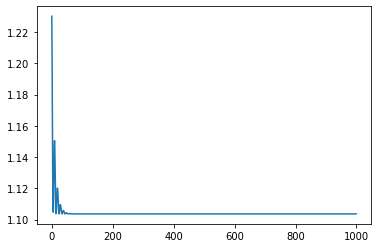

In [15]:
epoch = np.arange(0, epochs)
plt.plot(epoch,lossr)
plt.show()

In [16]:
# Avaliando a acurácia do modelo
inputs = torch.autograd.Variable(torch.Tensor(X_test.astype(np.float32)).float())
targets = torch.autograd.Variable(torch.Tensor(y_test.astype(np.float32)).float())

optimizer.zero_grad()
out = net(inputs)
loss = criterion(out, targets)
loss.backward()
optimizer.step()

predicted = out.data

print('Teste Loss: %.4f' % (loss.item()))

C:\ProgramData\Miniconda3\lib\site-packages\torch\nn\modules\loss.py:431: UserWarning: Using a target size (torch.Size([83])) that is different to the input size (torch.Size([83, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Teste Loss: 0.8585


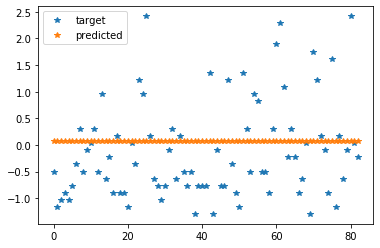

In [17]:
ninput = np.arange(len(y_test))
plt.figure()
plt.plot(ninput, y_test, '*', label = 'target')
plt.plot(ninput, predicted.numpy(), '*', label = 'predicted')
plt.legend()
plt.show()

In [18]:
predicted = (predicted.numpy()*np.std(y)) + np.mean(y)
target = (test_target*np.std(y)) + np.mean(y)

NameError: name 'test_target' is not defined

In [ ]:
plt.figure()
plt.plot(ninput, target, '*', label = 'target')
plt.plot(ninput, predicted, '*', label = 'predicted')
plt.title('Desnormalizado')
plt.legend()
plt.show()